# Image Time Series Workflow

This notebook gives a rough intro into how to load a sequence of camera trap images, select a subset for analysis, get the mean value of each subset in the red, blue, and green bands of the image, calculates a spectral index and chromaticities.

In this workbook we use `scikit-image`, `natsort`, and `colour` in addition to more standard libraries like `matplotlib`, `numpy`, and `os`.

### 1. Import Libraries

Also declare a start and end point to the rows and columns of the image that we'll be subsetting.

In [1]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import os
from natsort import natsorted, ns
import colour
from colour.plotting import *

ss_row_start = 1000
ss_row_end = 1200
ss_col_start = 1000
ss_col_end = 1500

/Users/lejoflores/dcew_camtrap_data/.conda/lib/python3.11/site-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028


### 2. Get a List of Files

Note the use of `natsorted` to create a sorted list of the files based on file name. This works because the file names from our camera traps are sequential. If the natural sequence of file names does not correspond to the order in which they were taken, some additional steps might be needed (i.e., you might need to extract the time stamp from the photo metadata and sort the images based on a chronologically increasing basis).

In [2]:
file_list = os.listdir('images/')

file_list = natsorted(file_list)

n_images = len(file_list)

### 3. Process Images

Create a container for the average value in the R,G,B bands of our subset, loop through and load each file, select the subset of the image to proces, take the mean, and store it in the container. 

In [3]:
rgb_avg = np.zeros((n_images,3))

counter = 0

for file in file_list:
    
    image = ski.io.imread('images/'+file)
    
    image_ss = image[ss_row_start:ss_row_end,ss_col_start:ss_col_end,:]
    
    rgb_avg[counter,:] = np.mean(image_ss, axis=(0,1))

    counter += 1
    
    
    

### 4. Plot Spectral Reflectance vs "Time"

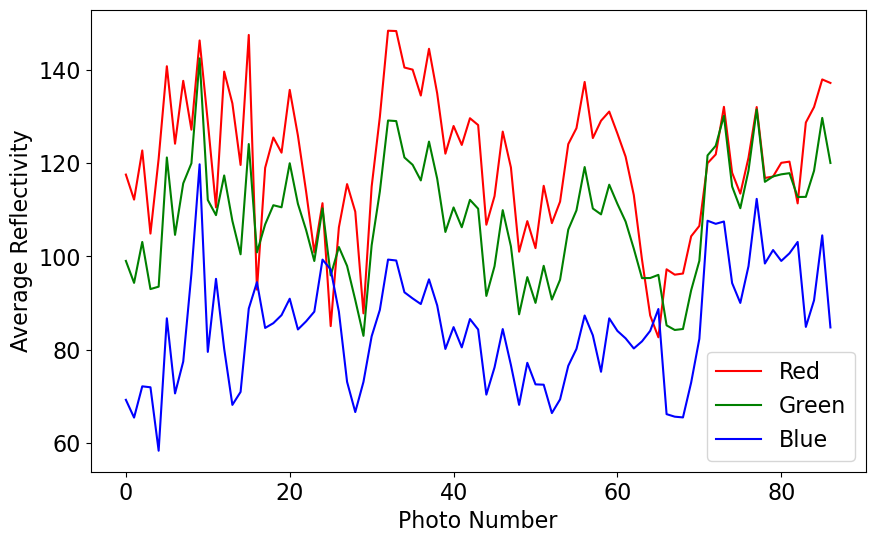

In [4]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))
plt.plot(rgb_avg[:,0],'r', label='Red')
plt.plot(rgb_avg[:,1],'g', label='Green')
plt.plot(rgb_avg[:,2],'b', label='Blue')
plt.xlabel('Photo Number')
plt.ylabel('Average Reflectivity')
plt.legend()
plt.show()


### 5. Compute a Spectral Index

In this case compute the Normalized Difference Turbidity Index (NDTI), defined as:

$$
NDTI = \frac{Red - Green}{Red + Green}
$$

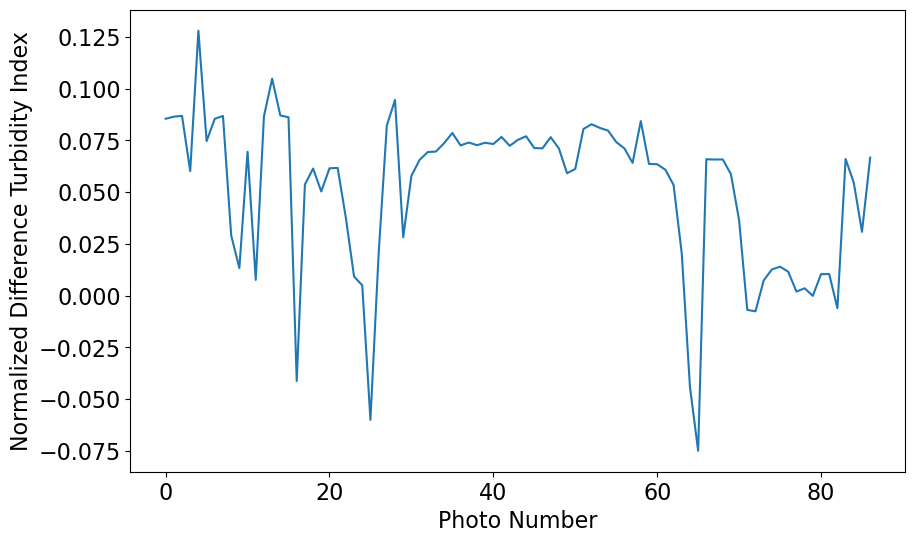

In [5]:
ndti = (rgb_avg[:,0] - rgb_avg[:,1])/(rgb_avg[:,0] + rgb_avg[:,1])

plt.figure(figsize=(10,6))
plt.plot(ndti)
plt.xlabel('Photo Number')
plt.ylabel('Normalized Difference Turbidity Index')
plt.show()


### 6. Compute Chromaticities

Calculate the chromaticities based on the spectral information and create a couple of plots. 

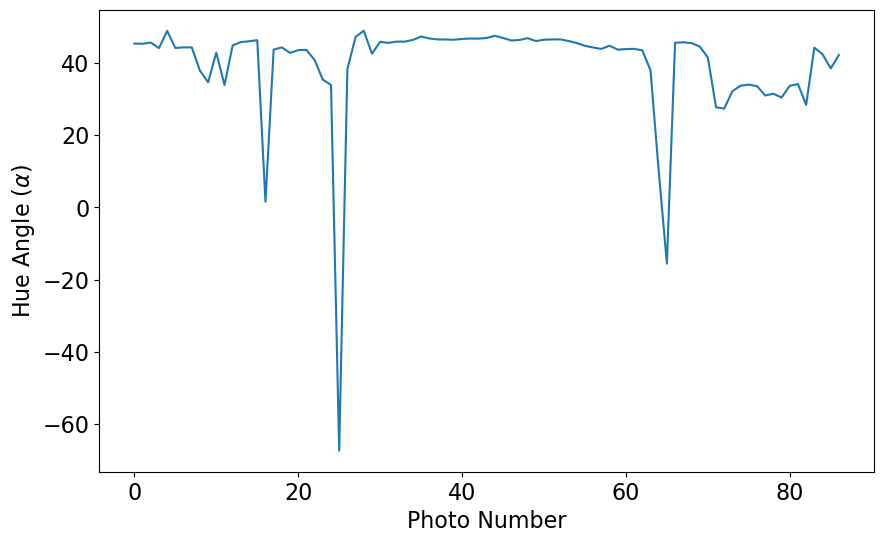

In [6]:
R = rgb_avg[:,0]
G = rgb_avg[:,1]
B = rgb_avg[:,2]

X = 2.7689*R + 1.7517*G + 1.1302*B
Y = 1.0000*R + 4.5907*G + 0.0601*B
Z = 0.0565*G + 5.5943*B

x = X / (X + Y + Z)
y = Y / (X + Y + Z)

alpha = (np.arctan2((x - 0.33),(y-0.33)))*180.0/np.pi

plt.figure(figsize=(10,6))
plt.plot(alpha)
plt.xlabel('Photo Number')
plt.ylabel('Hue Angle ('+r'$ \alpha $'+')')
plt.show()

/Users/lejoflores/dcew_camtrap_data/.conda/lib/python3.11/site-packages/colour/utilities/verbose.py:265: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)  # noqa: B028
/Users/lejoflores/dcew_camtrap_data/.conda/lib/python3.11/site-packages/colour/utilities/verbose.py:265: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028
/Users/lejoflores/dcew_camtrap_data/.conda/lib/python3.11/site-packages/colour/utilities/verbose.py:265: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028


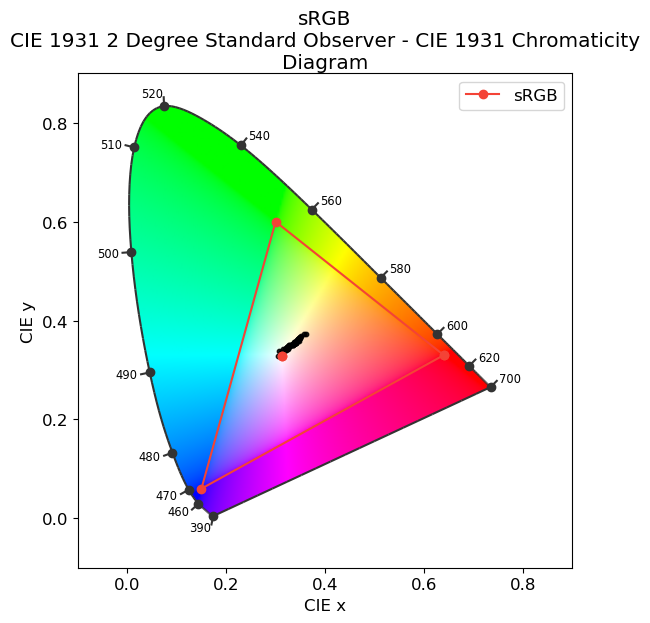

In [7]:
plt.rcParams.update({'font.size': 12})
scatter_kwargs = { 'marker': '.',
                   'c': 'k',
                }

fig, ax = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(rgb_avg,scatter_kwargs=scatter_kwargs)
